<a href="https://colab.research.google.com/github/RaminTKhameneh/SYS611HWs/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
from __future__ import absolute_import, division, print_function
!pip install simpy
import simpy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from copy import deepcopy as dc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#8.1 Inventory Simulation Analysis

Finding a good initial Q and S using a greedy method in one run

In [ ]:


#Q
ORDER_THRESHOLD = 10
#S
ORDER_UP_TO = 30

balance = 33168.09091456247

S_temp = dc(ORDER_UP_TO)
Q_temp = dc(ORDER_THRESHOLD)
R_temp = dc(balance)


def newSol(ORDER_UP_TO, ORDER_THRESHOLD):
  rand2 = np.random.randint(np.random.randint(100))
  rand3 = int(rand2/3)
  ORDER_UP_TO += rand2 
  ORDER_THRESHOLD += rand3
  return ORDER_UP_TO, ORDER_THRESHOLD

for run in range(500):
  # print(run)
  ORDER_UP_TO = dc(S_temp)
  ORDER_THRESHOLD = dc(Q_temp)
  balance = dc(R_temp)
  ORDER_UP_TO, ORDER_THRESHOLD = dc(newSol(ORDER_UP_TO, ORDER_THRESHOLD))
  NUM_RUNS = 1
  SIM_DURATION = 100

  product_price = 100.00 # dollars per product
  product_cost = 50.00 # dollars per product
  holding_cost = 2.00 # dollars per product per day
  arrival_rate = 5 # customers per day
  demand_lb = 1 # products per customer
  demand_ub = 4 # products per customer
  delivery_delay = 2 # days

  def warehouse_run(env, order_threshold, order_up_to):
      global inventory, balance, num_ordered
      i = 0
      inventory = order_up_to
      balance = 0
      num_ordered = 0
      
      while True:
          interarrival = np.random.exponential(1./arrival_rate)
          yield env.timeout(interarrival)
          balance -= holding_cost*inventory*interarrival
          i += 1
          customer = 'Cust {}'.format(i)
          demand = np.random.randint(demand_lb, demand_ub+1) 

          if inventory > demand:
              num_sold = demand
          else:
              num_sold = inventory
          balance += product_price*num_sold
          inventory -= num_sold
          if inventory < order_threshold and num_ordered == 0:
              quantity = order_up_to - inventory
              env.process(handle_order(env, quantity))
      
  def handle_order(env, quantity):
      global inventory, balance, num_ordered
      num_ordered = quantity
      balance -= product_cost*quantity
      
      yield env.timeout(delivery_delay)

      inventory += quantity
      num_ordered = 0

  def observe(env):
       while True:
          obs_time.append(env.now)
          inventory_level.append(inventory)
          yield env.timeout(0.1)


  for i in range(NUM_RUNS):
      np.random.seed(i)
      obs_time = []
      inventory_level = []
      env = simpy.Environment()
      env.process(warehouse_run(env, ORDER_THRESHOLD, ORDER_UP_TO))
      env.process(observe(env))
      env.run(until=SIM_DURATION)

  if balance > R_temp:
    Q_temp = dc(ORDER_THRESHOLD)
    S_temp = dc(ORDER_UP_TO)
    R_temp = dc(balance)
print('Q',Q_temp,'S',S_temp,'BALANCE',R_temp)


Q 30 S 100 BALANCE 54992.87443575563


Modified Initial Values to Start the 2000 Runs

In [ ]:
# number of simulation runs to perform
NUM_RUNS = 2000
# simulation duration (days)
SIM_DURATION = 100
# threshold inventory level to trigger an order (Q)
ORDER_THRESHOLD = Q_temp
# inventory level to order up to (S)
ORDER_UP_TO = S_temp

product_price = 100 # dollars per product
product_cost = 50.00 # dollars per product
holding_cost = 2 # dollars per product per day
arrival_rate = 5 # customers per day
demand_lb = 1 # products per customer
demand_ub = 4 # products per customer
delivery_delay = 2 # days

Functions

In [ ]:
def warehouse_run(env, order_threshold, order_up_to):

    global inventory, balance, num_ordered

    i = 0

    inventory = order_up_to
    balance = 0
    num_ordered = 0
    while True:
        interarrival = np.random.exponential(1./arrival_rate)
        yield env.timeout(interarrival)
        balance -= holding_cost*inventory*interarrival
        i += 1
        customer = 'Cust {}'.format(i)
        demand = np.random.randint(demand_lb, demand_ub+1) 
        if inventory > demand:
            num_sold = demand
        else:
            num_sold = inventory
        balance += product_price*num_sold
        inventory -= num_sold
        if inventory < order_threshold and num_ordered == 0:
            quantity = order_up_to - inventory
            env.process(handle_order(env, quantity))
def handle_order(env, quantity):
    global inventory, balance, num_ordered
    num_ordered = quantity
    balance -= product_cost*quantity

    yield env.timeout(delivery_delay)
    inventory += quantity
    num_ordered = 0

def observe(env):

    while True:
        obs_time.append(env.now)
        inventory_level.append(inventory)
        yield env.timeout(0.1)

Simulation

Revenue for N=2000 runs with Q=30 and S=100 is [54992.87443575563, 53593.09585367229, 57927.69162852743, 56478.54046040816, 53339.72116000895, 48547.009962313045, 51959.7415998385, 56695.766174729455, 53454.849999062164, 55110.091723438854, 52994.51519139463, 53624.73158820436, 54197.93063695574, 54464.811719365345, 51850.4002067257, 56976.83199818921, 55125.53517437003, 52930.52626690305, 54473.116976588804, 56469.386318030905, 46848.53567764319, 52962.39687071527, 55905.40347511292, 54633.801814276114, 52015.39177226512, 52624.72878158065, 55034.70453766825, 50991.50666155162, 54564.56158177761, 53699.30774574747, 53163.28312559493, 54589.24335036936, 51643.638546386, 48441.930260538385, 47479.14108581118, 49773.696258211494, 52851.87808942202, 59069.11944023746, 52931.94072117779, 50590.72275960446, 54104.88892753003, 63156.11219887735, 52515.22920263342, 51889.88860569621, 49317.125819488225, 58495.007993015926, 58850.006489981315, 47556.44365438464, 48744.277598457345, 52024.72322

53421.588875583424

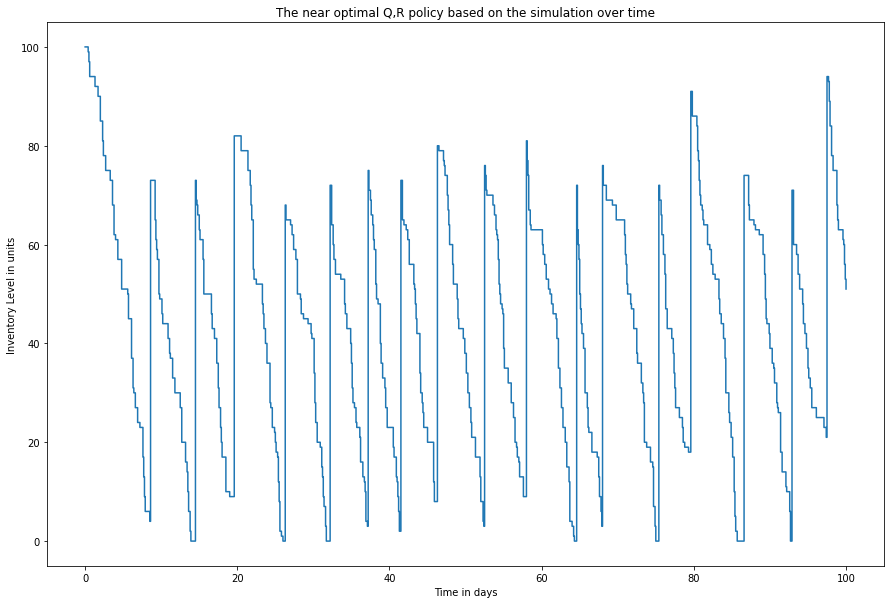

In [ ]:
#%% SECTION TO RUN ANALYSIS
BALANCE = []
Total =[]
Remaining = []

for i in range(NUM_RUNS):
    # set the random number seed
    np.random.seed(i)
    
    # arrays to record data
    obs_time = []
    inventory_level = []
    queue_w = []
    total_w = []
  
    # create the simpy environment
    env = simpy.Environment()
    # add the warehouse run process
    env.process(warehouse_run(env, ORDER_THRESHOLD, ORDER_UP_TO))
    # add the observation process
    env.process(observe(env))
    # run the simulation
    env.run(until=SIM_DURATION)
    # record the final observed net revenue
    BALANCE.append(balance)
    Total.append(balance)
    Remaining.append(inventory)
    
    # if NUM_RUNS <= 1:
        # print('Final balance: {:.2f}'.format(balance))
        
# plot the inventory over time
plt.figure(figsize=(15, 10))
plt.step(obs_time, inventory_level, where='post')
plt.xlabel('Time in days')
plt.ylabel('Inventory Level in units')
plt.title("The near optimal Q,R policy based on the simulation over time")
# print final results to console
print('Revenue for N={:} runs with Q={:} and S={:} is {:}:'.format(
        NUM_RUNS, ORDER_THRESHOLD, ORDER_UP_TO,BALANCE))

np.average(BALANCE)

**Graphsand Confdence Intervals**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


95%  confidence interval for the solutioon of the simulation is : 53286.803895128585 53552.29307753328


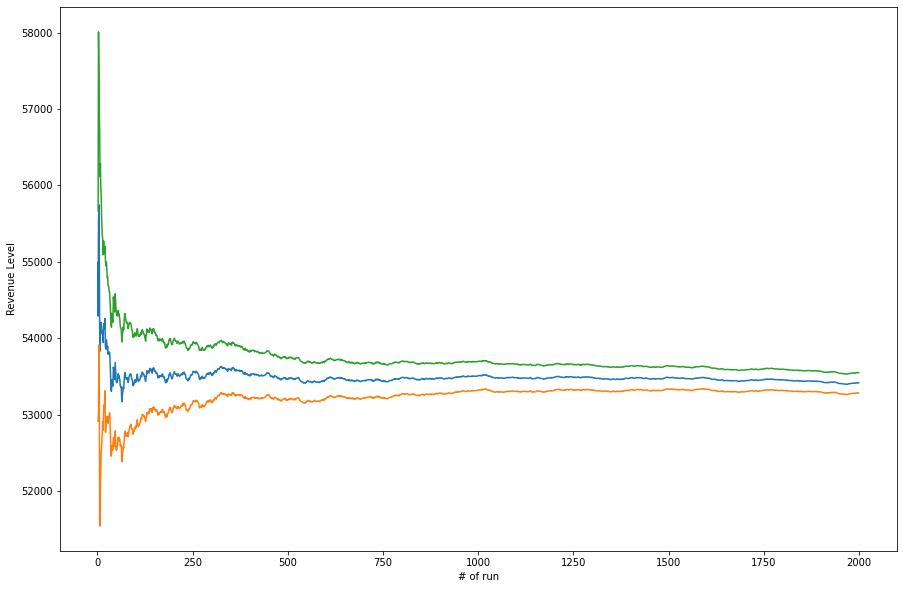

In [ ]:
mean =  np.array([np.mean(Total[0:i]) for i in range(NUM_RUNS)])
UB,LB = mean + 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)]) ,mean - 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)])

plt.figure(figsize=(15, 10))
plt.plot(range(NUM_RUNS), mean, label = "Mean")
plt.plot(range(NUM_RUNS), LB, label = "Lower Bound")
plt.plot(range(NUM_RUNS), UB, label = "Upper Bound")
plt.xlabel("# of run")
plt.ylabel("Revenue Level")
print ('95%  confidence interval for the solutioon of the simulation is :', LB[-1],UB[-1])

# 8.2 Factory Simulation Analysis

In [ ]:
NUM_RUNS = 1
SIM_DURATION = 5*8*52
NUM_SPARES = 1
NUM_REPAIRERS = 1
cost = 1029753.06

S_temp = dc(NUM_SPARES)
R_temp = dc(NUM_REPAIRERS)
C_temp = dc(cost)


def newSol(NUM_SPARES, NUM_REPAIRERS):
  rand2 = np.random.randint(3)+1
  # rand3 = int(rand2/3)
  # NUM_SPARES = rand2 + 1
  # NUM_REPAIRERS = rand3 + 1
  rand1 = np.random.random()
  if rand1 < 0.5:
    NUM_SPARES += rand2
  else:
    NUM_REPAIRERS += rand2

  return NUM_SPARES, NUM_REPAIRERS

    
def factory_run(env, repairers, spares):
    global cost
    cost = 0

    for i in range(50):
        env.process(operate_machine(env, i+1, repairers, spares))
    while True:
        cost += 3.75*8*repairers.capacity + 30*spares.capacity
        yield env.timeout(8.0)
    
def operate_machine(env, machine, repairers, spares):
    global cost
    
    while True:
        yield env.timeout(np.random.uniform(132,182))
        time_broken = env.now
        env.process(repair_machine(env, repairers, spares))
        yield spares.get(1)
        time_replaced = env.now
        cost += 20*(time_replaced-time_broken)
          
def repair_machine(env, repairers, spares):
    with repairers.request() as request:
        yield request
        yield env.timeout(np.random.uniform(4,10))
        yield spares.put(1)

def observe(env, spares):

    while True:
        obs_time.append(env.now)
        obs_cost.append(cost)
        obs_spares.append(spares.level)
        yield env.timeout(1.0)


for i in range(100):
  NUM_SPARES, NUM_REPAIRERS = dc(newSol(NUM_SPARES, NUM_REPAIRERS))
  # NUM_SPARES = dc(S_temp)
  # NUM_REPAIRERS = dc(R_temp)
  cost = dc(C_temp)
  # COST = []

  for i in range(NUM_RUNS):
      ORDER_UP_TO = dc(S_temp)
      ORDER_THRESHOLD = dc(Q_temp)
      balance = dc(R_temp)
      ORDER_UP_TO, ORDER_THRESHOLD = dc(newSol(ORDER_UP_TO, ORDER_THRESHOLD))

      obs_time = []
      obs_cost = []
      obs_spares = []
      
      np.random.seed(i)
      
      env = simpy.Environment()
      repairers = simpy.Resource(env, capacity=NUM_REPAIRERS) 
      spares = simpy.Container(env, init=NUM_SPARES, capacity=NUM_SPARES)
      env.process(factory_run(env, repairers, spares))
      env.process(observe(env, spares))
      env.run(until=SIM_DURATION)
      if cost < C_temp:
        S_temp = dc(NUM_SPARES)
        R_temp = dc(NUM_REPAIRERS)
        C_temp = dc(cost)
print(S_temp,R_temp,C_temp)



4 4 88626.30841067768


In [ ]:
# number of simulation runs to perform
NUM_RUNS = 500
# simulation duration (hours)
SIM_DURATION = 5*8*52
# number of spares to purchase (S)
NUM_SPARES = S_temp
# number of repairers to hire (R)
NUM_REPAIRERS = R_temp

Functions

In [ ]:
#%% SECTION TO DEFINE SIMULATION
    
def factory_run(env, repairers, spares):
    """ Process to run this simulation. 
        
    Args:
        env (simpy.Environment): the simulation environment
        repairers (simpy.Resource): the repairers resource
        spares (simpy.Container): the spares container
    """
    # define global variables for inter-process communication
    # note: this is a bad practice; however, is OK in this small script
    global cost
    cost = 0
    
    # launch the 50 machine processes
    for i in range(50):
        env.process(operate_machine(env, i+1, repairers, spares))
    # update the daily costs each day
    while True:
        cost += 3.75*8*repairers.capacity + 30*spares.capacity
        yield env.timeout(8.0)
    
def operate_machine(env, machine, repairers, spares):
    """ Process to operate a machine.
    
    Args:
        env (simpy.Environment): the simulation environment
        machine (int): the machine number
        repairers (simpy.Resource): the repairers resource
        spares (simpy.Container): the spares container
    """
    # define global variables for inter-process communication
    # note: this is a bad practice; however, is OK in this small script
    global cost
    
    while True:
        # wait until the machine breaks
        yield env.timeout(np.random.uniform(132,182))
        time_broken = env.now
        if NUM_RUNS <= 1:
            print('machine {} broke at {:.2f} ({} spares available)'.format(
                    machine, time_broken, spares.level))
        # launch the repair process
        env.process(repair_machine(env, repairers, spares))
        # wait for a spare to become available
        yield spares.get(1)
        time_replaced = env.now
        if NUM_RUNS <= 1:
            print('machine {} replaced at {:.2f}'.format(machine, time_replaced))
        # update the cost for being out of service
        cost += 20*(time_replaced-time_broken)
          
def repair_machine(env, repairers, spares):
    """ Process to repair a machine. 

    Args:
        env (simpy.Environment): the simulation environment
        repairers (simpy.Resource): the repairers resource
        spares (simpy.Container): the spares container    
    """
    with repairers.request() as request:
        # wait for a repairer to become available
        yield request
        # perform the repair
        yield env.timeout(np.random.uniform(4,10))
        # put the machine back in the spares pool
        yield spares.put(1)
        if NUM_RUNS <= 1:
            print('repair complete at {:.2f} ({} spares available)'.format(
                    env.now, spares.level))

def observe(env, spares):
    """ Process to observe the factory during a simulation.
    
    Args:
        env (simpy.Environment): the simulation environment
        factory (Factory): the factory
    """
    while True:
        obs_time.append(env.now)
        obs_cost.append(cost)
        obs_spares.append(spares.level)
        yield env.timeout(1.0)

Factory costs for N=500 runs with R=4 repairers and S=4 spares and C = [88626.30841067768, 92264.74539485906, 91348.82123563225, 91255.90284746594, 91536.04650242621, 88397.43677794743, 84591.46373037629, 87527.58756406592, 88315.37528053205, 91302.95599464478, 88155.39603612173, 88557.04381500359, 89338.14734089919, 83727.99971465887, 90689.29153744849, 92313.6775948948, 92051.78519099759, 91792.39497016033, 96534.41457393965, 91806.72627708755, 92180.71001553097, 92212.04444579364, 90091.14750167559, 86542.34462511519, 84940.67704008601, 87985.40339312423, 90137.23853778036, 85998.78471221865, 88711.80529837945, 85241.32901046812, 89628.74560487138, 91118.3533630413, 84869.93721258598, 99671.71032335093, 88573.57038940044, 93149.00592464893, 93157.21350026454, 86956.2491953911, 87279.0264246579, 88848.562762879, 89782.37070860386, 95903.6647841709, 90335.26725821014, 91274.73393204882, 90873.95767104151, 88686.20830922155, 92275.35877047133, 95186.4306464137, 87222.83143617396, 88342

90104.68384051534

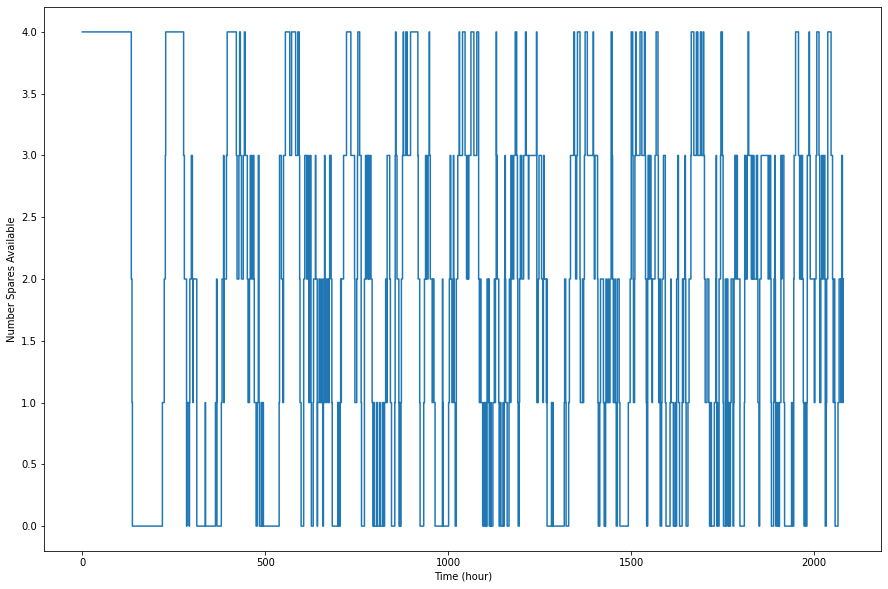

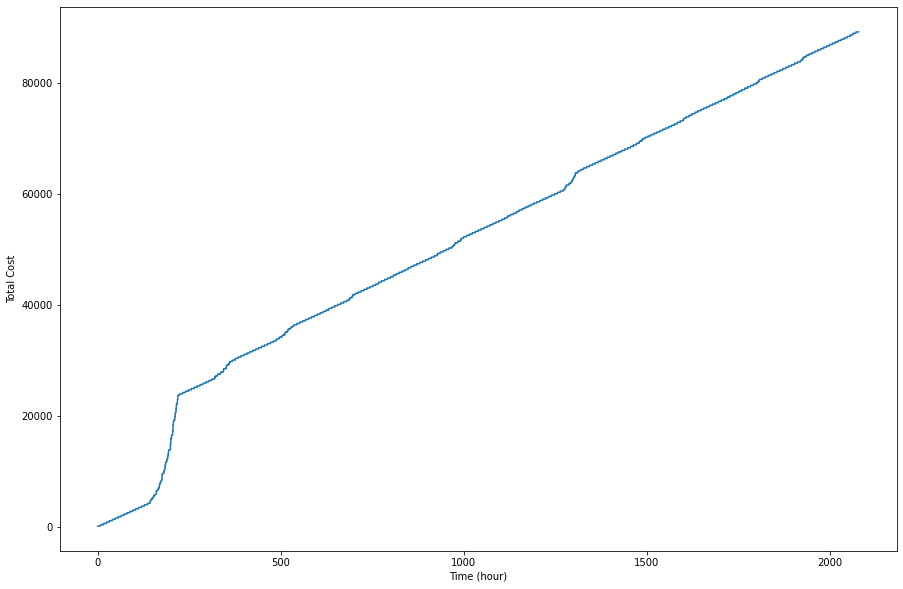

In [ ]:
#%% SECTION TO RUN ANALYSIS
        
# array to store outputs
COST = []
Total=[]

for i in range(NUM_RUNS):
    # arrays to record data
    obs_time = []
    obs_cost = []
    obs_spares = []
    
    # set the random number seed
    np.random.seed(i)
    
    # create the simpy environment
    env = simpy.Environment()
    # create the resources
    repairers = simpy.Resource(env, capacity=NUM_REPAIRERS) 
    spares = simpy.Container(env, init=NUM_SPARES, capacity=NUM_SPARES)
    # add the factory run process
    env.process(factory_run(env, repairers, spares))
    # add the observation process
    env.process(observe(env, spares))
    # run simulation
    env.run(until=SIM_DURATION)
    # record the final observed cost
    COST.append(obs_cost[-1])
    Total.append(COST[-1])
    
    if NUM_RUNS <= 1:
        # output the total cost
        print('Total cost: {:.2f}'.format(obs_cost[-1]))
        
# plot the number of spares available
plt.figure(figsize=(15, 10))
plt.step(obs_time, obs_spares, where='post')
plt.xlabel('Time (hour)')
plt.ylabel('Number Spares Available')
        
# plot the total cost accumulation
plt.figure(figsize = (15,10))
plt.step(obs_time, obs_cost, where='post')
plt.xlabel('Time (hour)')
plt.ylabel('Total Cost')

# print final results to console
print('Factory costs for N={:} runs with R={:} repairers and S={:} spares and C = {:}:'.format(
        NUM_RUNS, NUM_REPAIRERS, NUM_SPARES,COST))
# print('\n'.join('{:.2f}'.format(i) for i in COST))
np.average(COST)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


95%  confidence interval for the solutioon of the simulation is : 89796.56468805858 90416.75784680007


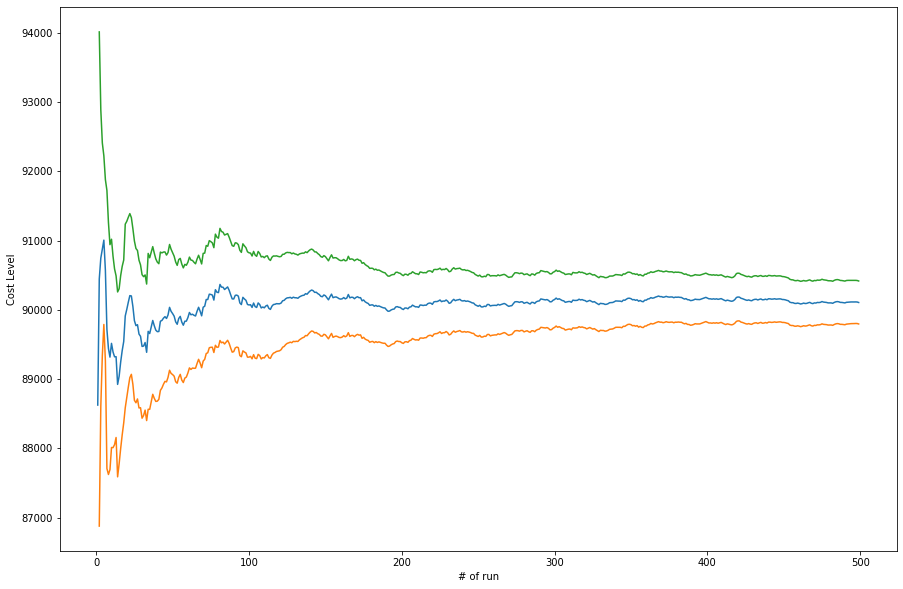

In [ ]:
mean =  np.array([np.mean(Total[0:i]) for i in range(NUM_RUNS)])
UB,LB = mean + 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)]) ,mean - 1.96*np.array([stats.sem(Total[0:i]) for i in range(NUM_RUNS)])

plt.figure(figsize=(15, 10))
plt.plot(range(NUM_RUNS), mean, label = "Mean")
plt.plot(range(NUM_RUNS), LB, label = "Lower Bound")
plt.plot(range(NUM_RUNS), UB, label = "Upper Bound")
plt.xlabel("# of run")
plt.ylabel("Cost Level")
print ('95%  confidence interval for the solutioon of the simulation is :', LB[-1],UB[-1])